In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Spécifiez le nom du fichier CSV (dans le même répertoire que le script)
file_name = 'DataCoSupplyChainDataset.csv'

# Lisez le fichier CSV
df = pd.read_csv(file_name, encoding='latin-1')
df.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [3]:
df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [4]:
df.Type.value_counts()

Type
DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: count, dtype: int64

In [5]:
df.shape

(180519, 53)

In [6]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [7]:
df.drop(columns=['Product Description' , 'Order Zipcode'] , axis = 1, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [9]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Image',
       'Product Na

In [10]:
df['Late_delivery_risk'].value_counts()

Late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64

In [11]:
df['Order Item Discount'].value_counts()

Order Item Discount
0.000000      10028
6.000000       4589
12.000000      4067
4.000000       3647
8.000000       3626
              ...  
23.750000         1
96.000000         1
400.000000        1
31.980000         1
61.189999         1
Name: count, Length: 1017, dtype: int64

<Axes: xlabel='Sales', ylabel='Order Item Discount'>

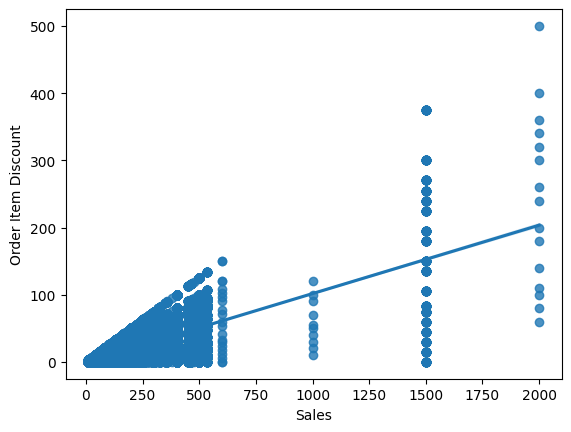

In [12]:
sns.regplot(x= 'Sales', y = 'Order Item Discount'  , data = df)

In [ ]:
df.drop(columns=['Customer Email' , 'Customer Fname', 'Customer Id', 'Customer Lname','Customer Password','Customer Street','Order City','Order Customer Id','order date (DateOrders)','Order Id','Order Item Cardprod Id'] , axis = 1, inplace = True)

In [ ]:
df.columns

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Supprimez les colonnes de la variable dépendante (Sales et Order Item Quantity) avant la division des données
X = df[df.columns]
exclude_columns = ['Sales', 'Order Item Quantity']
X = X.drop(columns=exclude_columns)
y_sales = df['Sales']
y_quantity = df['Order Item Quantity']

# Appliquez l'encodage des étiquettes aux colonnes catégorielles
label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_sales_train, y_sales_test, y_quantity_train, y_quantity_test = train_test_split(
    X, y_sales, y_quantity, test_size=0.2, random_state=42
)

# Remplacez les NaN par la moyenne des colonnes
imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Initialisez le modèle de régression linéaire
model_sales = LinearRegression()
model_quantity = LinearRegression()

# Entraînez le modèle sur les données d'entraînement
model_sales.fit(X_train, y_sales_train)
model_quantity.fit(X_train, y_quantity_train)

# Prédisez les valeurs sur l'ensemble de test
y_sales_pred = model_sales.predict(X_test)
y_quantity_pred = model_quantity.predict(X_test)

# Évaluez les performances du modèle en utilisant la MSE (Mean Squared Error)
mse_sales = mean_squared_error(y_sales_test, y_sales_pred)
mse_quantity = mean_squared_error(y_quantity_test, y_quantity_pred)

# Affichez les performances du modèle
print(f'Mean Squared Error (Sales): {mse_sales}')
print(f'Mean Squared Error (Quantity): {mse_quantity}')

Mean Squared Error (Sales): 2.238306231433533e-06
Mean Squared Error (Quantity): 0.27975167322925226


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Lire le fichier CSV
file_name = 'DataCoSupplyChainDataset.csv'
df = pd.read_csv(file_name, encoding='latin-1')

# Supprimer certaines colonnes
df.drop(columns=['Product Description', 'Order Zipcode', 'Customer Email', 'Customer Fname', 'Customer Id',
                 'Customer Lname', 'Customer Password', 'Customer Street', 'Order City', 'Order Customer Id',
                 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id'], axis=1, inplace=True)

# Séparer les données en ensembles d'entraînement et de test
X = df.drop(columns=['Sales', 'Order Item Quantity'])
y_sales = df['Sales']
y_quantity = df['Order Item Quantity']

label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns

for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

X_train, X_test, y_sales_train, y_sales_test, y_quantity_train, y_quantity_test = train_test_split(
    X, y_sales, y_quantity, test_size=0.2, random_state=42
)

# Remplacer les valeurs manquantes par la moyenne
imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Initialiser le modèle de forêt aléatoire pour les ventes
model_sales = RandomForestRegressor(n_estimators=100, random_state=42)
model_sales.fit(X_train, y_sales_train)

# Initialiser le modèle de forêt aléatoire pour la quantité
model_quantity = RandomForestRegressor(n_estimators=100, random_state=42)
model_quantity.fit(X_train, y_quantity_train)

# Prédire les valeurs sur l'ensemble de test
y_sales_pred = model_sales.predict(X_test)
y_quantity_pred = model_quantity.predict(X_test)

# Évaluer les performances du modèle en utilisant la MSE (Mean Squared Error)
mse_sales = mean_squared_error(y_sales_test, y_sales_pred)
mse_quantity = mean_squared_error(y_quantity_test, y_quantity_pred)

# Afficher les performances du modèle
print(f'Mean Squared Error (Sales): {mse_sales}')
print(f'Mean Squared Error (Quantity): {mse_quantity}')
